# Real Estate

[Dataset for the same](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Data/Real%20estate%20valuation%20data%20set.xlsx)


[EDA for this dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Python%20Notebooks/real_estate.ipynb)

In [26]:
# importing all the necessary packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn import metrics


In [3]:
# loading the dataset

estate = pd.read_excel('../../Lab1/Heenal/Data/Real estate valuation data set.xlsx')

In [4]:
estate.shape

(414, 8)

In [5]:
# dropping the target variable and retrieving the features
X = estate.drop(['Y house price of unit area','No'], axis = 1)

In [25]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254
6,2012.666667,34.5,623.47310,7,24.97933,121.53642
7,2013.416667,20.3,287.60250,6,24.98042,121.54228
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486


In [6]:
data_x = X.values

In [7]:
# target variable
Y = estate['Y house price of unit area']

In [8]:
data_y = Y.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.4, random_state=0)

In [10]:
X_train.shape

(248, 6)

In [11]:
X_test.shape

(166, 6)

In [12]:
X_new = preprocessing.scale(X_train)

In [13]:
lin = LinearRegression().fit(X_train,y_train)

In [17]:
lin.intercept_

-15749.735860948265

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(data_x, data_y, 'x', label='sampled data')
ax.plot(data_x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [157]:
lin.score(X_test, y_test)

0.5963978418529459

In [134]:
data_pred = lin.predict(X_test)

In [135]:
metrics.mean_squared_error(y_test, data_pred)

67.73912214763845

In [137]:
metrics.mean_absolute_error(y_test, data_pred)

6.149550743751473

In [139]:
metrics.mean_squared_log_error(y_test, data_pred)

/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/metrics/regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Plotting actual vs the predictions

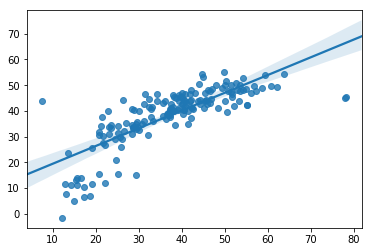

In [141]:
sns.regplot(y_test, data_pred)

### From the EDA performed earlier, we found out that X3, X4, X5 and X6 have the maximum correlation with target variable. hence trying out with them.

In [91]:
# dropping the target variable and retrieving the features
X_d = estate.drop(['Y house price of unit area','No', 'X1 transaction date'], axis = 1)

In [92]:
data_xd = X_d.values

In [93]:
# target variable
Y = estate['Y house price of unit area']

In [94]:
data_y = Y.values

In [95]:
lin = LinearRegression().fit(data_xd,data_y)

In [96]:
lin.score(data_xd,data_y)

0.5711617064827411

In [103]:
data_pred = lin.predict(data_xd)

In [104]:
metrics.mean_squared_error(data_yd, data_pred)

79.20185189210962

In [105]:
metrics.r2_score(data_yd, data_pred)

0.5711617064827411

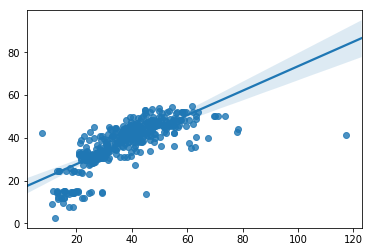

In [106]:
sns.regplot(data_yd, data_pred)

## Using sklearn to select the best features

In [81]:
data_xnew = SelectKBest(f_regression, k=6).fit_transform(data_x, data_y)

In [82]:
data_xnew.shape

(414, 6)

In [83]:
lin = LinearRegression().fit(data_xnew,data_y)

In [84]:
lin.score(data_xnew,data_y)

0.5823850447850816

In [101]:
data_pred = lin.predict(data_xd)

In [102]:
metrics.mean_squared_error(data_y, data_pred)

79.20185189210962

In [24]:
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/heenal/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


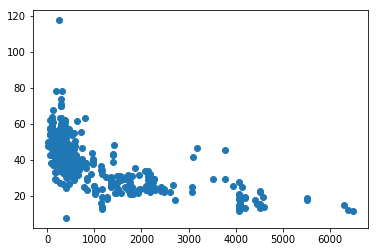

In [29]:
plt.scatter(data_xx,data_y)
plt.show()

In [31]:
data_xx = X[['X4 number of convenience stores']].values

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [x, Intercept, sigma]
 53%|█████▎    | 791/1500 [12:07<24:27,  2.07s/it] 
The acceptance probability does not match the target. It is 0.9858750807023525, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


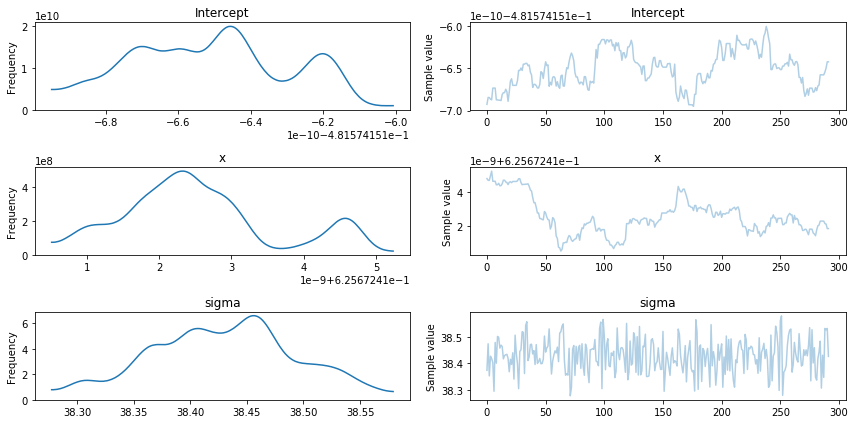

In [36]:
with pm.Model() as model: 
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sd=20)
    x_coeff = pm.Normal('x', 0, sd=20)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x_coeff * data_xx,
                        sd=sigma, observed=data_y)

    # Inference!
    trace = pm.sample(1000, chains=1)
    
pm.traceplot(trace)
plt.show()

ValueError: Image size of 1467167105x424 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x432 with 6 Axes>